<a href="https://colab.research.google.com/github/Izzy55/Tutorials/blob/master/Face_Detection_with_Python_Using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Detection with Python Using OpenCV

Tutorial Author:  Parul Pandey

In [1]:
# Equation  for Number of Colors:
#     Number of colors/ shades = 2^bpp,  where bpp represents the bits per pixel

# Binary images = 1 bit/pixel (2 shades, black or white)
# Grayscale images = 8 bits/pixel (256 different shades, 0 = black, 255 = white)
# Colored images = 8 bits/pixel (256 different shades, 3 channels - RGB)

## Import Images

In [2]:
# import necessary packages

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
img_raw = cv2.imread('gdrive/My Drive/mandrill_colour.png')

In [4]:
type(img_raw)

numpy.ndarray

In [5]:
img_raw.shape

(288, 288, 3)

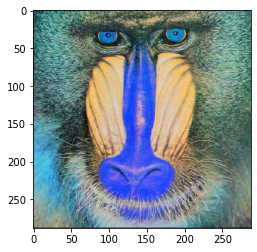

In [6]:
plt.imshow(img_raw)

This is not the expected color from the original image.  This happened because OpenCV and matplotlib have different orders of primary colors.  OpenCV reads images in the form BGR.  Matplotlib follows the order RGB.  To resolve this issue, use the cvtColor function to transform the channel to how Matplotlib expects it to be

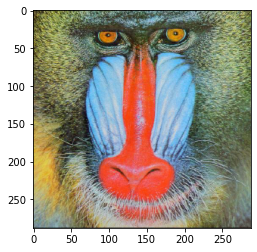

In [7]:
# Transform image color order to RGB

img = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)
plt.imshow(img)

This image is the same color as the original

## Basic Operations on Images

###Drawing Shapes on Images

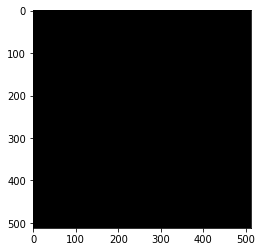

In [8]:
# Create a black images to act as a template

image_black = np.zeros(shape=(512,512,3), dtype=np.int16)
plt.imshow(image_black)

General function for drawing on images:

cv2.shape(line, rectangle, etc)(image, Pt1, Pt2, color, thickness)

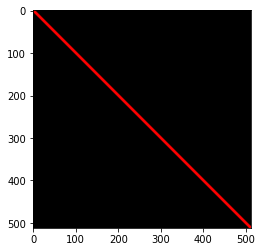

In [9]:
# Arguements passed to function for drawing shapes
# Image to be drawn on
# Coordinates of shape to be drawn: top left, bottom right
# Color of the shape to be drawn passed as a tuple ex:(255,0,0)
# Thickness of the geometric figure

# Draw a diagonal straight red line with thickness of 5 px (points specified are points through which the line will pass)
line_red = cv2.line(image_black, (0,0), (511,511), (255,0,0), 5)
plt.imshow(line_red)

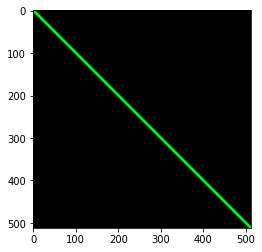

In [10]:
# Draw a diagonal green line with thickness 5 px
line_green = cv2.line(image_black, (0,0), (511,511), (0,255,0), 5)
plt.imshow(line_green)

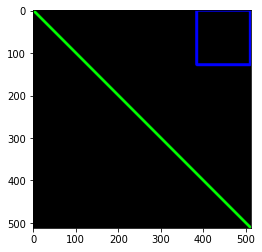

In [11]:
# Draw a rectangle with a thickness of 5 px

rectangle = cv2.rectangle(image_black, (384,0), (510,128), (0,0,255), 5)
plt.imshow(rectangle)

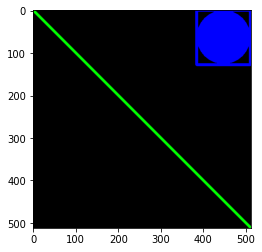

In [12]:
# For circles the center coordinates and radius need to be passed into the function
# Draw a blue circle with a radius of 63 inside the rectangle above
circle = cv2.circle(image_black, (447,63), 63, (0,0,255), -1)             # -1 means the circle will be filled
plt.imshow(circle)

###Writing Text On Images

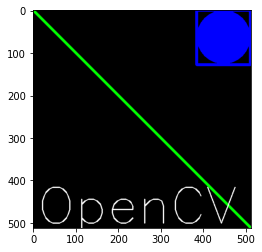

In [13]:
# Arguments to be passed to the function for writing text on Images
# Text to be Written
# Coordinates of the text, the bottom left coordinate
# Font type and scale
# Other attributes: color, thickness, line type (lineType = cv2.LINE_AA)

font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(image_black, 'OpenCV', (10,500), font, 4, (255,255,255), 2, cv2.LINE_AA)
plt.imshow(text)

##Face Detection

Face detection is performed by using classifiers that decide whether a given image is positive(face) or negative(not a face). A classifier needs to be trained on thousands of images with and without faces. OpenCV already has two pre-trained face detection classifiers which can readily be used in a program. 

The two classifiers are:  
Haar Classifier and
Local Binary Pattern(LBP) classifier.

**Haar feature-based cascade classifier**s

'Haar features' extraction

After the tremendous amount of training data (in the form of images) is fed into the system, the classifier begins by extracting Haar features from each image. Haar Features are kind of convolution kernels which primarily detect whether a suitable feature is present on an image or not. 

These Haar Features are like windows and are placed upon images to compute a single feature. The feature is essentially a single value obtained by subtracting the sum of the pixels under the white region and that under the black.

For demonstration purpose, let's say we are only extracting two features, hence we have only two windows here. The first feature relies on the point that the eye region is darker than the adjacent cheeks and nose region. The second feature focuses on the fact that eyes are kind of darker as compared to the bridge of the nose. Thus, when the feature window moves over the eyes, it will calculate a single value. This value will then be compared to some threshold and if it passes that it will conclude that there is an edge here or some positive feature.

'Integral Images' concept

The algorithm proposed by Viola Jones uses a 24X24 base window size, and that would result in more than 180,000 features being calculated in this window.  The solution devised for this computationally intensive process is to go for the Integral Image concept. The integral image means that to find the sum of all pixels under any rectangle, we simply need the four corner values.

This means, to calculate the sum of pixels in any feature window, we do not need to sum them up individually. All we need is to calculate the integral image using the 4 corner values. 


'Adaboost' : to improve classifier accuracy

As pointed out above, more than 180,000 features values result within a 24X24 window. However, not all features are useful for identifying a face. To only select the best feature out of the entire chunk, a machine learning algorithm called Adaboost is used. What it essentially does is that it selects only those features that help to improve the classifier accuracy. It does so by constructing a strong classifier which is a linear combination of a number of weak classifiers. This reduces the amount of features drastically to around 6000 from around 180,000.

Using 'Cascade of Classifiers'

Another way by which Viola Jones ensured that the algorithm performs fast is by employing a cascade of classifiers. The cascade classifier essentially consists of stages where each stage consists of a strong classifier. This is beneficial since it eliminates the need to apply all features at once on a window. Rather, it groups the features into separate sub-windows and the classifier at each stage determines whether or not the sub-window is a face. In case it is not, the sub-window is discarded along with the features in that window. If the sub-window moves past the classifier, it continues to the next stage where the second stage of features is applied.

In [14]:
# Load the image to be tested

test_image = cv2.imread('gdrive/My Drive/baby1.jpg')

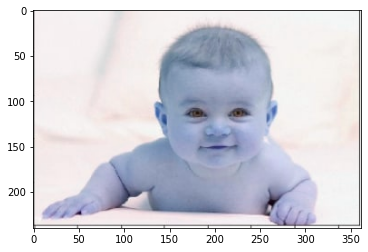

In [15]:
# Display the image
plt.imshow(test_image)

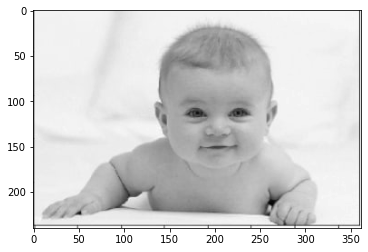

In [16]:
# Convert image to grayscale 
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(test_image_gray, cmap='gray')

In [17]:
# Convert image from BGR to RBG format to display true colors
def convertToRGB(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



Load Classifier for frontal face

In [28]:
 haar_cascade_face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
print(haar_cascade_face)

<CascadeClassifier 0x7f966cb01410>


Explination of **detectMultiscale** module:

Returns a rectangle with coordinates (x,y,w,h) around the detected face
Parameter 1 = scalefactor = helps compensate for the fact that some faces are more prominent than others in most photos
Parameter 2 = minNeighbors = specifies the number of neighbors a rectangle should have to be called a face

*   Returns a rectangle with coordinates (x,y,w,h) around the detected face
*   Parameter 1 = scaleFactor = helps compensate for the fact that some faces are more prominent than others in most photos
*   Parameter 2 = minNeighbors = specifies the number of neighbors a rectangle should have to be called a face









In [29]:
# Detect Faces with detectMultiscale module
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

print('Number of faces detected: ', len(faces_rects))

Number of faces detected:  1


In [30]:
# Loop over all coordinates returned by detectMultiScale and draw rectangles around them
# Green rectangle with thickness 2
for (x,y,w,h) in faces_rects:
  cv2.rectangle(test_image, (x,y), (x+w, y+h), (0,255,0), 2)

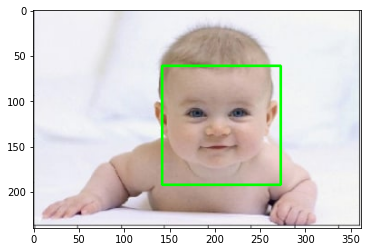

In [31]:
# Display original image in color and look at accuracy of face detection
plt.imshow(convertToRGB(test_image))

## Face Detection with a Generalized Function

In [41]:
# create generalized function
def detect_faces(cascade, test_image, scaleFactor=1.1):
  # create a copy of the image
  image_copy = test_image.copy()
  # convert the test image to grayscale as required by opencv face detector
  gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
  # apply haar classifier to detect faces
  faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
  
  # draw rectangles around detected faces
  for (x,y,w,h) in faces_rect:
    cv2.rectangle(image_copy, (x,y), (x+w, y+h), (0,255,0), 15)

  return image_copy  

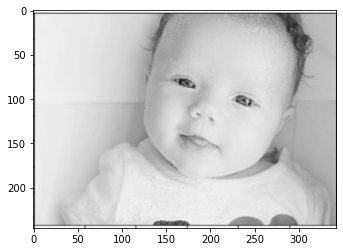

In [42]:
# load new image
test_image2 = cv2.imread('gdrive/My Drive/baby2.jpg')

# convert to grayscale
test_image2_gray = cv2.cvtColor(test_image2, cv2.COLOR_BGR2GRAY)

# display grayscale image
plt.imshow(test_image2_gray, cmap='gray')

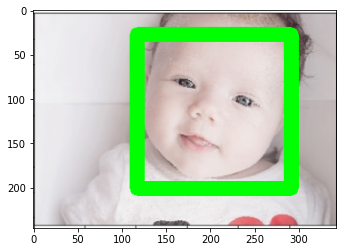

In [43]:
# call function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)
plt.imshow(convertToRGB(faces))

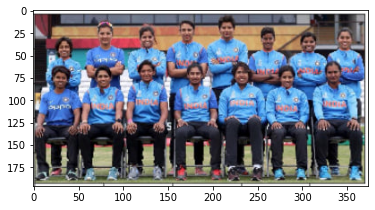

In [44]:
# try face detection function on group photo

# load image
test_image3 = cv2.imread('gdrive/My Drive/group.jpg')

# call the function to detect faces
faces3 = detect_faces(haar_cascade_face, test_image3)

# convert to RGB and display image
plt.imshow(convertToRGB(faces3))

Source:

https://www.datacamp.com/community/tutorials/face-detection-python-opencv

Sincere thank you to Parul Pandey for sharing the tutorial